## 第五次恒星物理编程作业

设置参数在EZ-Web网站上运行一个恒星演化模型，选取的参数如下：

|参数 |值 |
|:----:|:----:|
|Initial Mass|1|
|Metallicity|0.01|
|Maximum Age|0|
|Maximum Number of Steps|0|

其中质量是以$M_\odot$为单位，最大年龄设置为 0，最大步长数设置为0. 这样该 code 会持续运行模拟，直到不能进一步演化结束。

#### 1. 画出该恒星在 H-R 图上的不同时刻的演化轨迹

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read summary file
df=pd.read_csv('./ezweb_14356/summary.txt', sep='\s+',header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0.0,1.0,-0.041185,-0.039390,3.771088,7.136055,4.934900,16.212357,-1.641484,...,0.040109,3.052861e-34,0.0,1.742601e-08,0.0,0.0,0.0,0.0,0.0,0.0
1,1,50000.0,1.0,-0.034638,-0.036470,3.771265,7.137104,4.934808,16.213296,-1.645583,...,0.041862,3.379185e-34,0.0,1.769623e-08,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100000.0,1.0,-0.034738,-0.036507,3.771258,7.137103,4.934809,16.213294,-1.645578,...,0.041775,3.366637e-34,0.0,1.770634e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,3,160000.0,1.0,-0.034721,-0.036501,3.771260,7.137103,4.934815,16.213298,-1.645566,...,0.041674,3.352244e-34,0.0,1.770642e-08,0.0,0.0,0.0,0.0,0.0,0.0
4,4,232000.0,1.0,-0.034699,-0.036494,3.771262,7.137102,4.934825,16.213305,-1.645545,...,0.041553,3.334896e-34,0.0,1.770650e-08,0.0,0.0,0.0,0.0,0.0,0.0


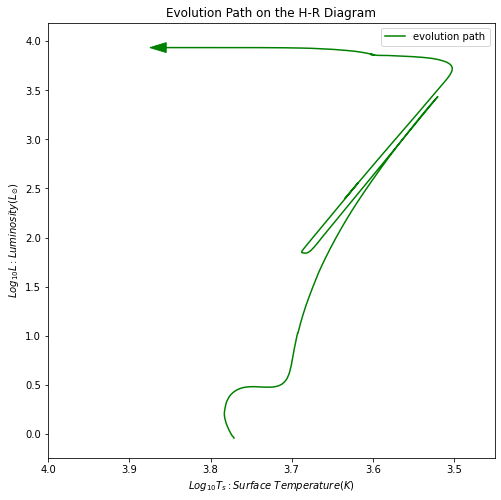

In [2]:
#plot volution path on the H-R diagram 
plt.figure(figsize=(8,8))
plt.plot(df.iloc[:,5],df.iloc[:,3],c='g',label='evolution path')
ax=plt.gca()
ax.set_xlim((3.45,4))
ax.invert_xaxis()
ax.set_xlabel('$Log_{10}T_s : Surface\ Temperature(K)$')
ax.set_ylabel('$Log_{10}L : Luminosity(L_{\odot})$')
ax.set_title('Evolution Path on the H-R Diagram')
plt.arrow(df.iloc[-1].iat[5], df.iloc[-1].iat[3],0.01 ,0, shape='full', lw=1,
   length_includes_head=True, head_width=.1,head_length=0.02, color='g')
plt.legend()
plt.savefig('evolution.jpg',dpi=300)
plt.show()

上面选取的参数实际上十分接近太阳，因此可以看到演化轨迹也与太阳的类似\
<img src="evolution.jpg" width="50%" align=center>

#### 2. 选取开始时刻、中间某时刻、结束时刻的对应的总压强、温度、密度的径向分布图

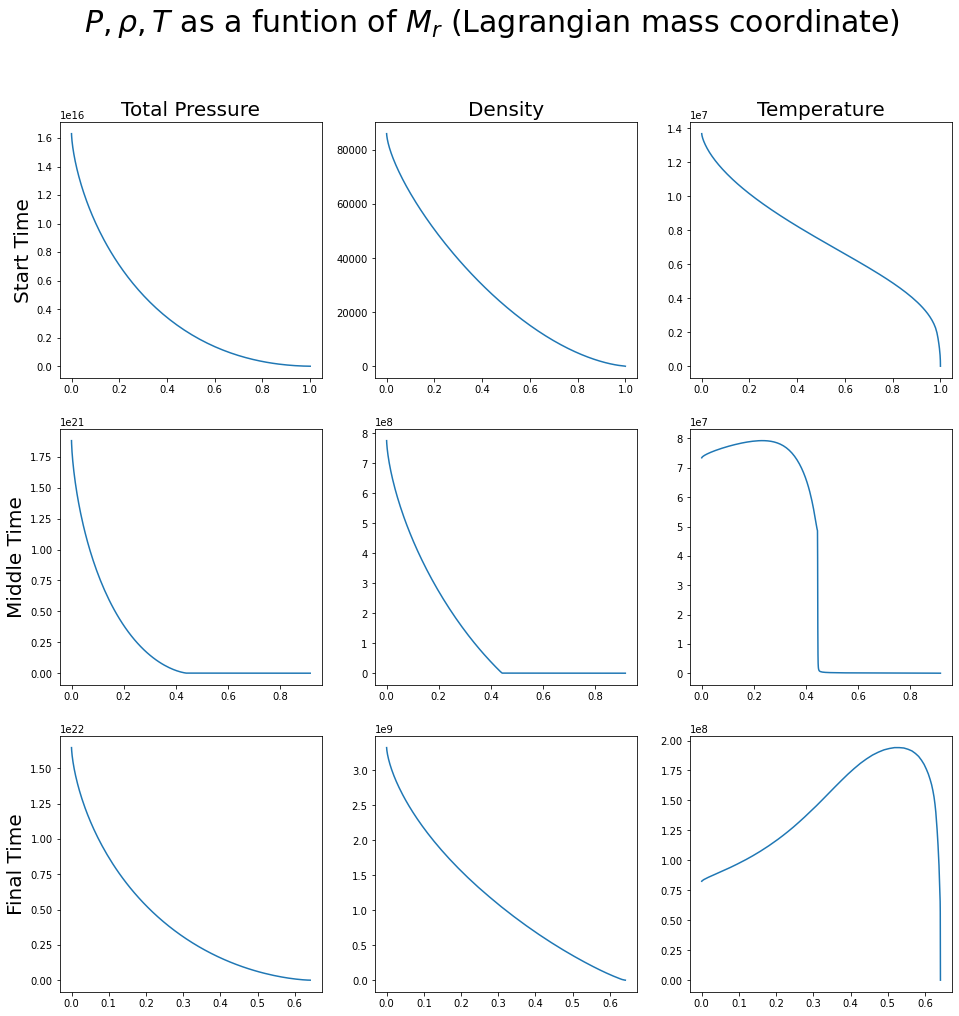

In [9]:
df1=pd.read_csv('./ezweb_14356/structure_00000.txt', sep='\s+',header=None)
df2=pd.read_csv('./ezweb_14356/structure_00450.txt', sep='\s+',header=None)
df3=pd.read_csv('./ezweb_14356/structure_00893.txt', sep='\s+',header=None)

fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(16,16))
def Plot_rad(ax, df):
    for i in range(3,6):
        ax[i-3].plot(df.iloc[:,0],df.iloc[:,i])
Plot_rad(ax[0],df1)
Plot_rad(ax[1],df2)
Plot_rad(ax[2],df3)
ax[0,0].set_title("Total Pressure",fontsize=20)
ax[0,1].set_title("Density",fontsize=20)
ax[0,2].set_title("Temperature",fontsize=20)
ax[0,0].set_ylabel('Start Time',fontsize=20)
ax[1,0].set_ylabel('Middle Time',fontsize=20)
ax[2,0].set_ylabel('Final Time',fontsize=20)
plt.suptitle(r'$P,\rho,T$ as a funtion of $M_r$ (Lagrangian mass coordinate)',fontsize=30)
plt.savefig('Structure.jpg',dpi=300)
plt.show()

实际绘制过程中发现不能以r为自变量，考虑到后期演化会形成红巨星，体积膨胀很大，因此$P,\rho,T$的图像在很r变化的很大范围内都趋于水平。从上往下看，按照恒星演化轨迹，中心的密度和压强会先增大（核收缩）再减小，温度也是中心会显著上升而后下降，可以预想，随着中心温度进一步下降，核反应停止，最终就会形成白矮星。